In [1]:
import pandas as pd

In [11]:
sc_rna = pd.read_csv('./GSE104276_all_pfc_2394_UMI_TPM_NOERCC.xls', sep='\t', index_col=0)

In [12]:
sc_pseudotime = pd.read_csv('./Pseudotime_time.txt', sep=' ', index_col=0)

In [16]:
df = pd.merge(sc_rna.T, sc_pseudotime, left_index=True, right_index=True, how='left')

In [17]:
from scipy.stats import spearmanr

In [25]:
gene = []
cor = []
pval = []

for i in df.columns[:-2]:
    gene.append(i)
    test = spearmanr(df[i], df['Pseudotime'])
    cor.append(test.correlation)
    pval.append(test.pvalue)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [36]:
res = pd.DataFrame()
res['Gene'] = gene
res['Cor'] = cor
res['Pval'] = pval

res.sort_values('Cor').dropna().to_csv('gene_vs_pseudotime.csv')
res.sort_values('Cor').dropna()

,Gene,Cor,Pval
22858,VIM,-0.482388,8.874118e-140
9400,KIAA0101,-0.470988,1.836852e-132
14906,NUSAP1,-0.467545,2.627863e-130
18382,RRM2,-0.464989,1.009031e-128
4874,DHCR24,-0.463064,1.543417e-127
...,...,...,...
18439,RTN1,0.152803,5.617071e-14
20528,STMN1,0.161718,1.707375e-15
20054,SOX4,0.171820,2.549628e-17
7909,H3F3B,0.218134,3.530511e-27


In [40]:
import seaborn as sns
import numpy as np

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pseudotime', ylabel='MALAT1'>

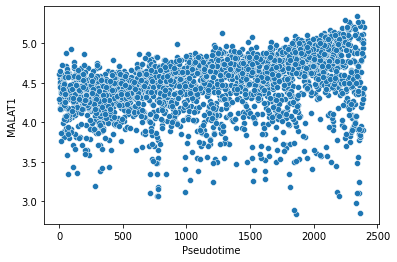

In [43]:
sns.scatterplot(df['Pseudotime'], df['MALAT1'].apply(np.log10))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pseudotime', ylabel='VIM'>

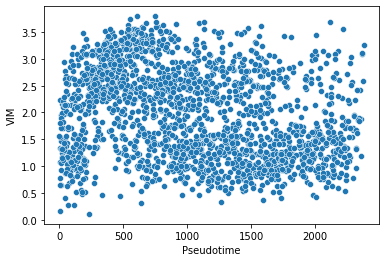

In [42]:
sns.scatterplot(df['Pseudotime'], df['VIM'].apply(np.log10))

In [46]:
def extW(x):
    return int(x.split('_')[0][2:])

sc_pseudotime['Week'] = sc_pseudotime.index
sc_pseudotime['Week'] = sc_pseudotime['Week'].apply(extW)
sc_pseudotime

,State,Pseudotime,Week
sample_name,,,
GW26_PFC1_O2_sc9,1,1,26
GW23_PFC2_SF1_F23_sc35,1,2,23
GW26_PFC1_I3_sc5,1,3,26
GW26_PFC1_L1_sc4,1,4,26
GW26_PFC1_L1_sc8,1,5,26
...,...,...,...
GW23_PFC1_sc98,6,2390,23
GW26_PFC1_Q1_sc22,6,2391,26
GW23_PFC1_sc102,6,2392,23


In [49]:
spearmanr(sc_pseudotime['Week'], sc_pseudotime['Pseudotime'])

SpearmanrResult(correlation=0.29003649015516725, pvalue=1.2775663977316912e-47)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 2500.0)

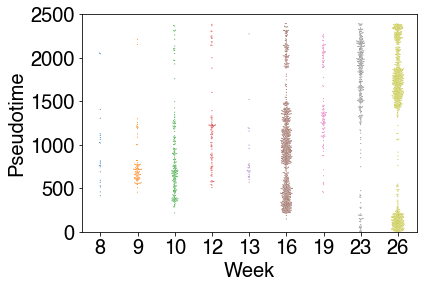

In [108]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=[6,4])

label_size = 20
plt.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['ytick.labelsize'] = label_size
plt.rcParams['font.family'] = 'Helvetica'

sns.swarmplot(sc_pseudotime['Week'], sc_pseudotime['Pseudotime'], s=1)
plt.ylabel('Pseudotime', fontsize=label_size)
plt.xlabel('Week', fontsize=label_size)
plt.ylim([0, 2500])

In [84]:
zc_pseudotime = pd.read_table('./zc_pseudotime.txt').sort_values('traj.coord')
zc_pseudotime['Week'] = zc_pseudotime.index
zc_pseudotime['Week'] = zc_pseudotime['Week'].apply(extW)
zc_pseudotime['Rank'] = range(len(zc_pseudotime['Week']))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 2500.0)

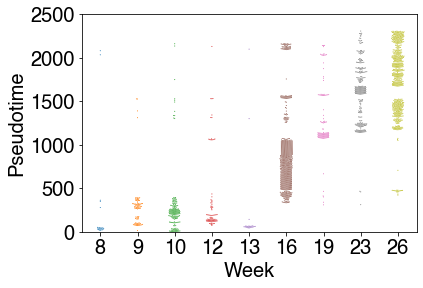

In [109]:
fig, ax = plt.subplots(figsize=[6,4])


sns.swarmplot(zc_pseudotime['Week'], zc_pseudotime['Rank'], s=1)
plt.ylabel('Pseudotime', fontsize=label_size)
plt.xlabel('Week', fontsize=label_size)
plt.ylim([0, 2500])

In [57]:
spearmanr(zc_pseudotime['Week'], zc_pseudotime['traj.coord'])

SpearmanrResult(correlation=0.7931593391819722, pvalue=0.0)

In [80]:
jb_pseudotime = pd.read_csv('./time2.csv', index_col=0).sort_values('Lineage1')
jb_pseudotime['Week'] = jb_pseudotime.index
jb_pseudotime['Week'] = jb_pseudotime['Week'].apply(extW)
jb_pseudotime['Rank'] = range(len(jb_pseudotime['Week']))

In [81]:
spearmanr(jb_pseudotime['Week'], jb_pseudotime['Lineage1'])

SpearmanrResult(correlation=0.07019129312177498, pvalue=0.0005886262347874366)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 2500.0)

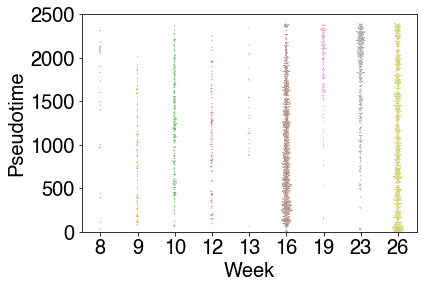

In [110]:
fig, ax = plt.subplots(figsize=[6,4])
sns.swarmplot(jb_pseudotime['Week'], jb_pseudotime['Rank'], s=1)
plt.ylabel('Pseudotime', fontsize=label_size)
plt.xlabel('Week', fontsize=label_size)
plt.ylim([0, 2500])

In [65]:
from scipy.stats import chi2_contingency as c
c(pd.crosstab(sc_pseudotime['State'], sc_pseudotime['Week']))

(2249.086332088391,
 0.0,
 48,
 array([[  2.03675856,   7.79281537,  16.91395155,   7.79281537,
           2.12531328,  69.86967419,  10.62656642,  28.69172932,
          66.15037594],
        [  2.38262322,   9.11612364,  19.786132  ,   9.11612364,
           2.48621554,  81.73433584,  12.43107769,  33.56390977,
          77.38345865],
        [  4.7556391 ,  18.19548872,  39.4924812 ,  18.19548872,
           4.96240602, 163.13909774,  24.81203008,  66.9924812 ,
         154.45488722],
        [  3.07435255,  11.76274018,  25.5304929 ,  11.76274018,
           3.20802005, 105.46365915,  16.04010025,  43.30827068,
          99.84962406],
        [  5.83166249,  22.31244779,  48.42815372,  22.31244779,
           6.08521303, 200.05137845,  30.42606516,  82.15037594,
         189.40225564],
        [  0.73015873,   2.79365079,   6.06349206,   2.79365079,
           0.76190476,  25.04761905,   3.80952381,  10.28571429,
          23.71428571],
        [  4.18880535,  16.0267335 ,  34.7852

In [66]:
pd.crosstab(sc_pseudotime['State'], sc_pseudotime['Week'])

Week,8,9,10,12,13,16,19,23,26
State,,,,,,,,,
1,0,0,0,0,0,2,0,25,185
2,6,69,62,20,16,66,5,1,3
3,1,0,3,3,1,51,13,105,318
4,4,2,50,1,0,217,2,9,35
5,10,15,60,51,6,362,59,29,15
6,0,0,2,2,0,6,0,14,52
7,2,2,14,11,1,85,41,141,139
